# Looking at Distribution of Sex

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [23]:
mpl.style.use('seaborn')

cols= ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", 
      "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", 
      "hours-per-week", "native-country", "label"]
df = pd.read_csv('adult.data', header=-1)
df = df.rename(columns = {i:c for i,c in enumerate(cols)})

df['sex'] = df['sex'].str.strip()
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


There are 32,561 entries and 15 attributes

In [25]:
print(df['sex'].value_counts())
print('------------------------')
print(df['sex'].value_counts() / len(df))

Male      21790
Female    10771
Name: sex, dtype: int64
------------------------
Male      0.669205
Female    0.330795
Name: sex, dtype: float64


There are 21790 males (**66.92%**) and 10771 females (**33.08%**).

This means that the accuracy of the adversary model should be about 66.92%.

In [11]:
print(df['label'].value_counts())
print('------------------------')
print(df['label'].value_counts() / len(df))

 <=50K    24720
 >50K      7841
Name: label, dtype: int64
------------------------
 <=50K    0.75919
 >50K     0.24081
Name: label, dtype: float64


There are 24720 individuals below 50K (**75.92%**) and 7841 above 50K (**24.08%**).

This means that the accuracy of the classifer should be above 75.92%.

In [26]:
print(pd.crosstab(df.sex, df.label))
print('------------------------')
print(pd.crosstab(df.sex, df.label) / len(df))

label    <=50K   >50K
sex                  
Female    9592   1179
Male     15128   6662
------------------------
label      <=50K      >50K
sex                       
Female  0.294586  0.036209
Male    0.464605  0.204601


In [98]:
def label_bars(bars):
    """
    adapted from example on matplotlib
    """
    for bar in bars:
        prop = bar.get_height()
        plt.annotate('{:.4f}'.format(prop), xy=(bar.get_x() + bar.get_width() / 2, prop),
                    xytext=(0,3), textcoords="offset points", ha='center', va='bottom')

 <=50K    9592
 >50K     1179
Name: label, dtype: int64
------------------------
 <=50K    0.890539
 >50K     0.109461
Name: label, dtype: float64


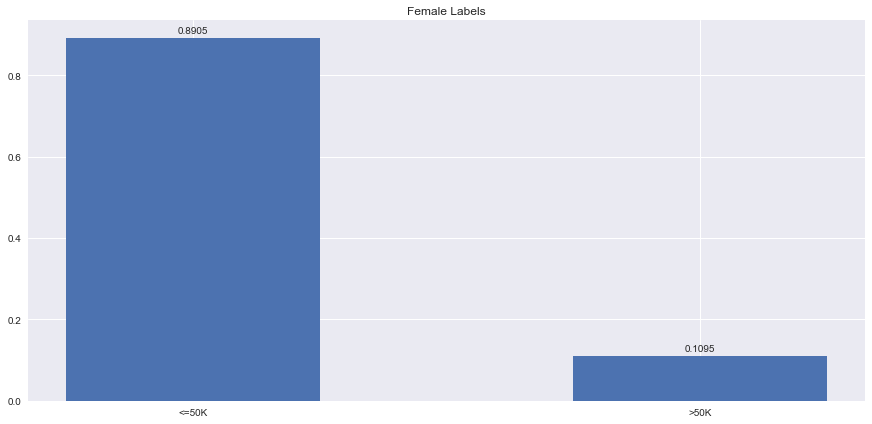

In [113]:
# Females
female = df[df['sex']=='Female']
print(female['label'].value_counts())
print('------------------------')
print(female['label'].value_counts() / len(female))

plt.figure(figsize=(15,7))
bars = plt.bar(np.array([0,.5]), female['label'].value_counts() / len(female), .25)
label_bars(bars)
plt.xticks([0,.5], ['<=50K', '>50K'])
plt.title("Female Labels")
plt.show()

 <=50K    15128
 >50K      6662
Name: label, dtype: int64
------------------------
 <=50K    0.694263
 >50K     0.305737
Name: label, dtype: float64


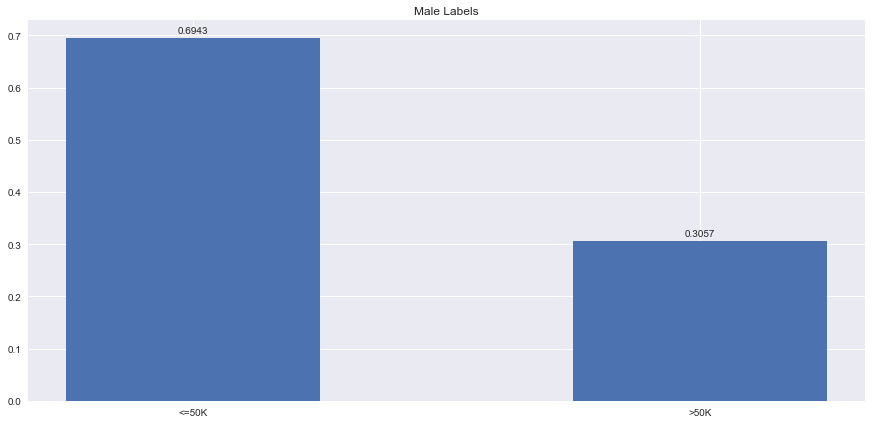

In [114]:
# Males
male = df[df['sex']=='Male']
print(male['label'].value_counts())
print('------------------------')
print(male['label'].value_counts() / len(male))

plt.figure(figsize=(15,7))
bars = plt.bar(np.array([0,.5]), male['label'].value_counts() / len(male), .25)
label_bars(bars)
plt.xticks([0,.5], ['<=50K', '>50K'])
plt.title("Male Labels")
plt.show()

In [77]:
cross = pd.crosstab(df.label, df.sex) / len(df)
cross

sex,Female,Male
label,,
<=50K,0.294586,0.464605
>50K,0.036209,0.204601


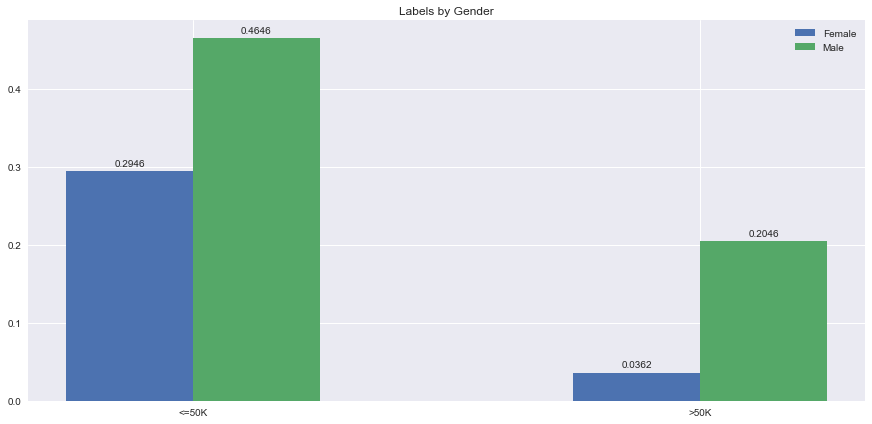

In [119]:
# Bar chart to see distribution

width = .25
pos = np.array([i for i in range(len(cross))])
plt.figure(figsize=(15,7))
female_bars = plt.bar(pos, cross['Female'], width, label='Female')
male_bars = plt.bar(pos + width, cross['Male'], width, label='Male')
# all_bars = plt.bar(pos + width*2, df.label.value_counts() / len(df), width, label='Overall')
plt.xticks(pos+width*.5, ['<=50K', '>50K'])
plt.legend()
plt.title('Labels by Gender')

def label_bars(bars):
    """
    adapted from example on matplotlib
    """
    for bar in bars:
        prop = bar.get_height()
        plt.annotate('{:.4f}'.format(prop), xy=(bar.get_x() + bar.get_width() / 2, prop),
                    xytext=(0,3), textcoords="offset points", ha='center', va='bottom')

        
label_bars(female_bars)
label_bars(male_bars)
# label_bars(all_bars)
        
plt.show()
# df[['sex','label']].plot.bar()